## Points generation example with Orion

In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import numpy as np
np.seterr(over='ignore')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

target_path = '/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/VarClump/'

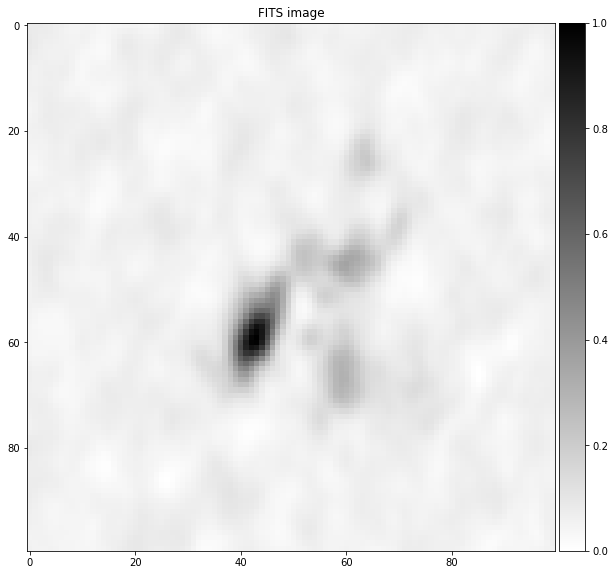

In [2]:
fits_path = '../../data/images/Orion.cont.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

60


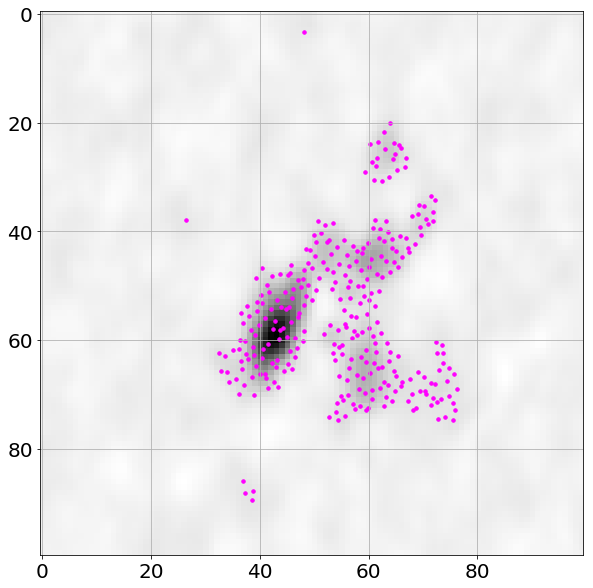

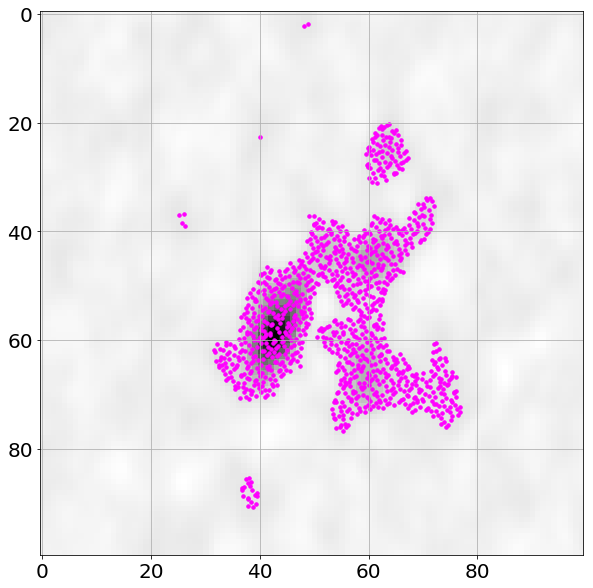

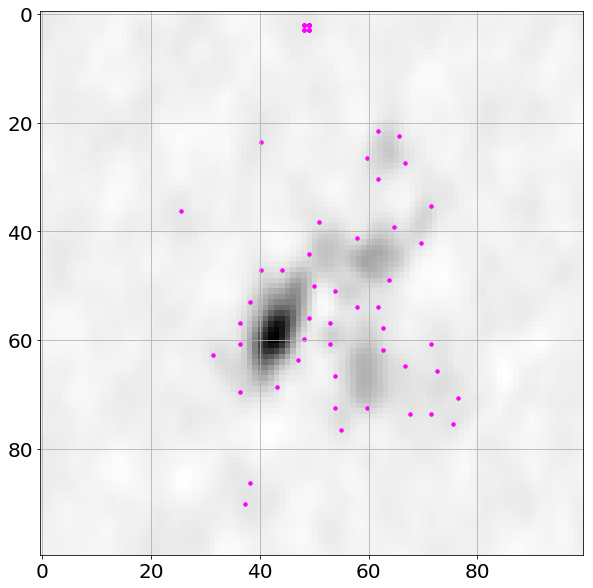

In [3]:
##########################################
# Approach 1
##########################################

base_level = 0.95*estimate_rms(data)

# number of points of each type
Nc = 300
Nb = int(0.2*Nc)
print(Nb)
Ne = 4*Nc-Nb
points_method = 'halton'

if points_method=='random':
    center_points = random_centers_generation(data, Nc, base_level=base_level, power=5.)
    collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
    boundary_points = boundary_points_generation(data, base_level, Nb)

elif points_method=='halton':
    points = qrandom_centers_generation(dfunc, Nc+Ne, base_level, ndim=2)
    center_points = points[0:Nc]
    collocation_points = points[Nc:Nc+Ne]
    boundary_points = boundary_points_generation(data, base_level, Nb)


# right format
xc = center_points[:,0]; yc = center_points[:,1]
xe = collocation_points[:,0]; ye = collocation_points[:,1]
xb = boundary_points[:,0]; yb = boundary_points[:,1]


# visualizing the choosen points
points_plot(data, center_points=center_points, title='', save_path=target_path+'center_points.eps')
points_plot(data, center_points=collocation_points, title='', save_path=target_path+'collocation_points.eps')
points_plot(data, center_points=boundary_points, title='', save_path=target_path+'boundary_points.eps')